## Домашнее задание 2
### Линейные модели
---


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#### Задание 1 (Теоретическое)
На лекции было сказано, что большие по модулю веса могут сигнализировать о наличии переобучения или о наличии линейной зависимости между признаками. В этом задании вам предстоит показать, что при отсутствии регуляризации (штрафа за большие веса) коэффициенты перед зависимыми признаками могут расти неограниченно.

Рассмотрим данные, в которых истинная зависимость целевой переменной $y$ от признака $x$ описывается коэффициентом w (то есть истинная зависимость выглядит как $y = wx + ...$, где ... - другие признаки НЕ ЗАВИСЯЩИЕ от x). Искусственно добавим в модель зависимый признак равный -x. 
После обучения модели получим зависимость $y = w_1x + w_2 (-x) + ...$.

Покажите, что веса $w_1$ и $w_2$ могут быть сколь угодно большими.

**Решение:** заметим, что в такой модели $y = (w_1 - w_2)x + \ldots$ . Это значит, что любая пара $(w_1, w_2)$ с фиксированной разностью $w_1 - w_2 = \alpha$ будет давать один и тот же ответ $y$. В частности, можно взять $w_1 = w + \alpha,\: w_2 = w$ при любом $k$ и получить неограниченно большие (по модулю) веса.

#### Задание 2

Линейная регрессия с L2-регуляризацией или Ridge регрессия состоит в минимизации следующего функционала:
$$||Y - Xw||^2 + \lambda ||w||^2 \rightarrow min$$

Для данной задачи можно выписать явное решение:
$$w = (X^TX + \lambda I)^{-1}X^TY$$

Реализуйте свой класс для гребневой регрессии, воспользовавшись формулой выше.

In [3]:
class MyRidgeRegression:
    
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    
    def fit(self, X, y):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1!
        # Не применяйте регуляризацию к параметру b

        # Коэффициент лямбда сохранен в переменной self.alpha
        # Вам может понадобиться функция np.eye
        a = np.ones((X.shape[0], 1))
        X = np.hstack((X, a))
        I = np.eye(X.shape[1])
        
        I[-1, -1] = 0
        self.w = np.linalg.inv( X.T @ X + self.alpha * I) @ X.T @ y
        return self
        
    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        
        a = np.ones((X.shape[0], 1))
        X = np.hstack((X, a))
        y_pred = X @ self.w
        return y_pred
    
    def get_weights(self):
        return self.w

Протестируем наш алгоритм на искусственных данных и сравним с линейной регрессией без регуляризации

In [20]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [24]:
linear_regr = LinearRegression()
ridge_regr = MyRidgeRegression(alpha=0.01)

linear_regr.fit(X_train, y_train)
ridge_regr.fit(X_train, y_train)

linear_regr_predictions = linear_regr.predict(X_test)
ridge_regr_predictions = ridge_regr.predict(X_test)

В качестве метрики качества воспользуемся MAE (средняя абсолютная ошибка)

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
print('Linear regression: ', mean_absolute_error(y_test, linear_regr_predictions))

Linear regression:  78.65049847615055


In [27]:
print('Ridge regression: ', mean_absolute_error(y_test, ridge_regr_predictions))

Ridge regression:  78.48703226910085


Попробуйте подобрать такой коэффициент регуляризации, чтобы ошибка на тесте была меньше, чем у модели без регуляризации.

#### Задание 3
В этом задании предлагается поиграться с различными ядрами SVM и подобрать лучшие параметры для каждого из них

Вам дан датасет (находится в файле banknote.data), в котором представлены различные статистики подсчитанные для изображения купюр. Задача состоит в классификации купюр на подлинные и фальшивые на основе этих данных.
(Подробнее https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


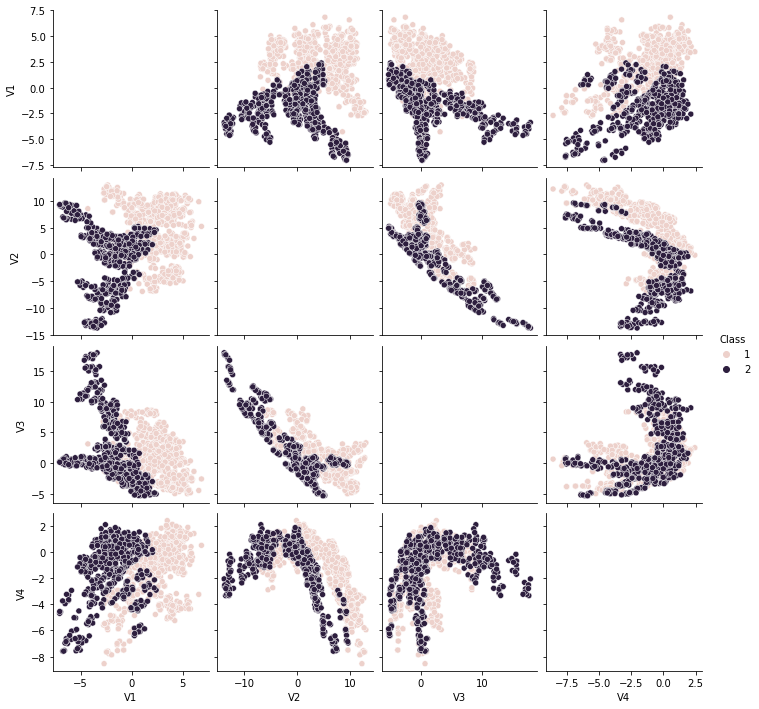

In [28]:
import seaborn as sns

# data = pd.read_csv('banknote.data', sep=',', header=-1)
data = pd.read_csv('https://datahub.io/machine-learning/banknote-authentication/r/banknote-authentication.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# одновременно нарисовать график и цветной и с распределениями не получается (особенность датасета)
sns.pairplot(data, diag_kind='', hue='Class')
# sns.pairplot(data, diag_kind='kde')

data.head()

Разделите выборку на трейн и тест в соотношении 1:1

In [29]:
# ВАШ КОД ЗДЕСЬ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

In [30]:
from sklearn.svm import SVC

Для каждого из ядер svc (параметр kernel='linear', 'poly', 'rbf') постарайтесь подобрать наилучший набор параметров, который максимизирует метрику F1-score на тесте. 

НАПОМИНАНИЕ: $ F1 = 2\frac{precision \cdot recall}{precision + recall} $

ПОДСКАЗКА: параметр C в SVC отвечает за коэффициент регуляризации, degree - степень полинома в полиномиальном ядре, gamma - коэффициент в экспоненте у гауссовского ядра. Про другие парамеры (если понадобятся) предлагается прочитать самостоятельно.

In [31]:
from sklearn.metrics import f1_score, make_scorer

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# ВАШ КОД ЗДЕСЬ
params = {
    'linear' : {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    'poly' : {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'degree': [2, 3, 4, 5]},
    'rbf'  : {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.01, 0.1, 1, 2, 5, 10, 100]}
}

In [43]:
%%time
cv_results = {}

for kernel, cv_params in params.items():
    gs = GridSearchCV(SVC(kernel=kernel), param_grid=cv_params, verbose=1, n_jobs=4)
    gs.fit(X_train, y_train)
    cv_results[kernel] = gs

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 49 candidates, totalling 245 fits
CPU times: user 344 ms, sys: 26.7 ms, total: 371 ms
Wall time: 2.12 s


In [44]:
cv_results

{'linear': GridSearchCV(estimator=SVC(kernel='linear'), n_jobs=4,
              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, verbose=1),
 'poly': GridSearchCV(estimator=SVC(kernel='poly'), n_jobs=4,
              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3, 4, 5]},
              verbose=1),
 'rbf': GridSearchCV(estimator=SVC(), n_jobs=4,
              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.01, 0.1, 1, 2, 5, 10, 100]},
              verbose=1)}

In [45]:
for kernel, result in cv_results.items():
    
    print(kernel, '\tbest_params:', result.best_params_, '\t\tscore =', result.best_score_)

linear 	best_params: {'C': 100} 		score = 0.992711308579287
poly 	best_params: {'C': 1000, 'degree': 2} 		score = 0.9912408759124087
rbf 	best_params: {'C': 1, 'gamma': 0.1} 		score = 1.0


#### БОНУС

Предлагаю немного расслабиться и посмотреть как делается полиномиальная регрессия (добавление степенных признаков в модель) и как Lasso проводит отбор признаков.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


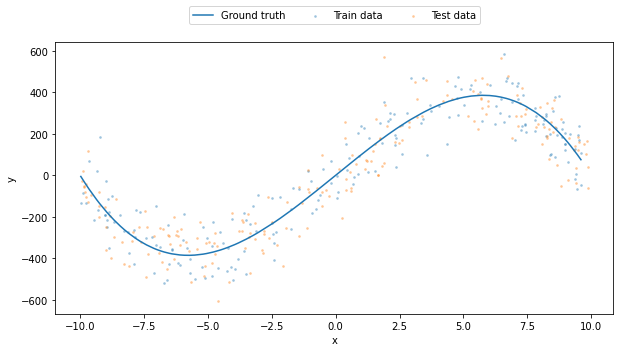

In [ ]:
# Data generation

def gen_batch(n, w, beta):
    d = len(w)
    X = np.random.uniform(-10, 10, (n, 1))
    X = np.sort(X, axis=0)
    X = np.hstack([X ** i for i in range(d)])
    t = X.dot(w) + np.random.normal(size=n) / beta ** 0.5
    return X, t

n = 200
d = 21
w_true = np.zeros(d)
w_true[1] = 100
w_true[3] = -1
beta_true = 1e-4

X_train, t_train = gen_batch(n, w_true, beta_true)
X_test, t_test = gen_batch(n, w_true, beta_true)

# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(X_train[:, 1], t_train, s=3, label='Train data', alpha=0.3)
plt.scatter(X_test[:, 1], t_test, s=3, label='Test data', alpha=0.3)
plt.plot(X_train[:, 1], X_train.dot(w_true), label='Ground truth')

plt.axes().set_xlabel('x')
plt.axes().set_ylabel('y')
plt.legend(ncol=3, loc=9, bbox_to_anchor=(0.5, 1.15))
plt.show()

In [ ]:
# Ridge Regression with Cross-Validation
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=20, alphas=10.**np.arange(-6, 3, 1),
                fit_intercept=False)
ridge.fit(X_train, t_train)
w_ridge = ridge.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.76585e-40): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.2712e-40): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.2409e-40): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.2437e-40): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.24093e-40): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWa

In [ ]:
# Lasso Regression with Cross-Validation
from sklearn.linear_model import LassoCV, Lasso
lasso = LassoCV(cv=20, alphas=10.**np.arange(-6, 3, 1),
                fit_intercept=False)
lasso.fit(X_train, t_train)
w_lasso = lasso.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1775739.6625101515, tolerance: 1577.7662610055072
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1025043.0825981541, tolerance: 1577.7662610055072
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882277.6677565788, tolerance: 1577.7662610055072
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Ridge Regression
Features remaining: 21 / 21
Train error: 9132.736981725746
Test error:  12222.565702479043
--------------------------------------------------
Lasso Regression
Features remaining: 16 / 21
Train error: 14773.85388899415
Test error:  16448.057977874047


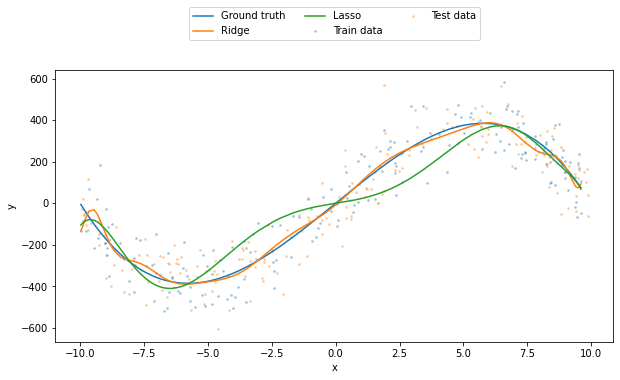

In [ ]:
def l2_error(X, t, w):
    return np.sum((X.dot(w.ravel()) - t) ** 2)

# Comparison
print('Ridge Regression')
print('Features remaining:', np.sum(np.abs(w_ridge) > 1e-15), '/', d)
print('Train error:', l2_error(X_train, t_train, w_ridge) / n)
print('Test error: ', l2_error(X_test, t_test, w_ridge) / n)
print('-'*50)
print('Lasso Regression')
print('Features remaining:', np.sum(np.abs(w_lasso) > 1e-15), '/', d)
print('Train error:', l2_error(X_train, t_train, w_lasso) / n)
print('Test error: ', l2_error(X_test, t_test, w_lasso) / n)

plt.figure(figsize=(10, 5))
plt.scatter(X_train[:, 1], t_train, s=3, label='Train data', alpha=0.3)
plt.scatter(X_test[:, 1], t_test, s=3, label='Test data', alpha=0.3)
plt.plot(X_train[:, 1], X_train.dot(w_true), label='Ground truth')
plt.plot(X_train[:, 1], X_train.dot(w_ridge), label='Ridge')
plt.plot(X_train[:, 1], X_train.dot(w_lasso), label='Lasso')

plt.axes().set_xlabel('x')
plt.axes().set_ylabel('y')
plt.legend(ncol=3, loc=9, bbox_to_anchor=(0.5, 1.25))
plt.show()